# Figure 2

Calibrated Bit Test Predict - Mean and Std (with masked bins)
Mean Prob Truex: [0.07240867 0.1262877  0.17454126 0.21992705 0.27142997 0.32305286
 0.37983738 0.42456452 0.47106921 0.52594047 0.57118975 0.63040642
 0.67476332 0.72811512 0.7745199  0.82723251 0.8748535  0.92862207
 0.95346016]
Std Prob Truex: [0.0017862  0.00121723 0.00222099 0.00071069 0.00397607 0.00384163
 0.0067528  0.01162627 0.00790337 0.00192323 0.00540146 0.0093074
 0.00383459 0.00523729 0.00577052 0.00676724 0.00474985 0.00382055
 0.00123873]
Mean Prob Predx: [0.07950805 0.12728343 0.17554716 0.21997221 0.27145738 0.32305292
 0.37983762 0.42456453 0.47106921 0.5259405  0.57118975 0.63040643
 0.67476334 0.72813231 0.77449758 0.8272531  0.87553739 0.93208194
 0.95615288]
Std Prob Predx: [0.00155867 0.00187494 0.00202435 0.00070867 0.00398513 0.00384163
 0.00675302 0.01162627 0.00790338 0.00192323 0.00540143 0.00930738
 0.0038346  0.00524531 0.00575786 0.00687886 0.00408455 0.00251241
 0.00175135]


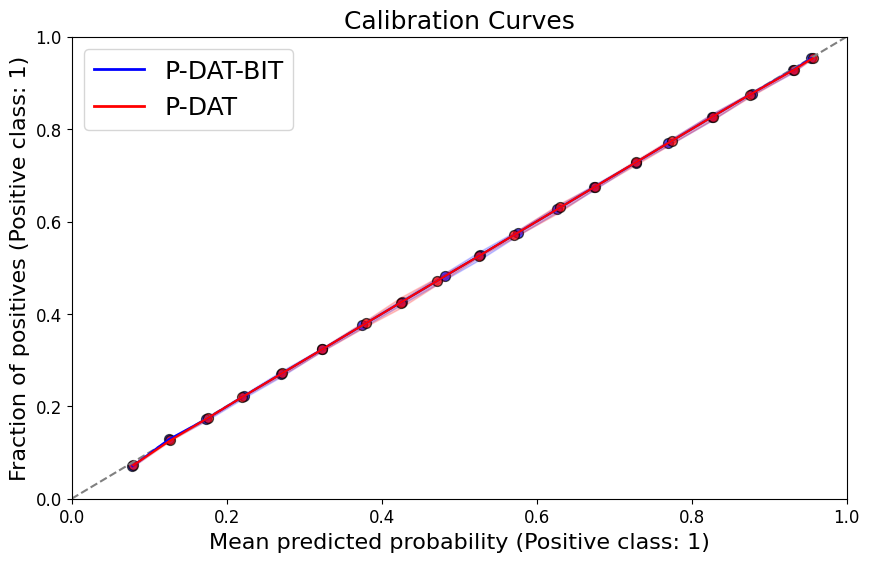

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from matplotlib.lines import Line2D

base_path = '/home/daohan/apps/Bit/SMEFTNet/code/plots_data/'
names = [f'calibrated_test_predict{i}.npz' for i in range(1, 6)]
bit_names = [f'calibrated_bit_test_predict{i}.npz' for i in range(1, 6)]

def load_data(filenames):
    data = [np.load(base_path + fname) for fname in filenames]
    return [d['prediction'] for d in data], [d['labels'] for d in data]

prob, truth = load_data(names)
probx, truthx = load_data(bit_names)

n_bins = 20
prob_true, prob_pred = zip(*[calibration_curve(t, p, n_bins=n_bins) for t, p in zip(truth, prob)])
prob_truex, prob_predx = zip(*[calibration_curve(t, p, n_bins=n_bins) for t, p in zip(truthx, probx)])

max_len = max(map(len, prob_true))
max_lenx = max(map(len, prob_truex))

def pad_array(arr_list, target_length, masked=False):
    if masked:
        padded = np.ma.masked_array(np.zeros((len(arr_list), target_length)), mask=True)
    else:
        padded = np.zeros((len(arr_list), target_length))
   
    for i, arr in enumerate(arr_list):
        padded[i, :len(arr)] = arr
    return padded

prob_true = pad_array(prob_true, max_len)
prob_pred = pad_array(prob_pred, max_len)
prob_truex = pad_array(prob_truex, max_lenx, masked=True)
prob_predx = pad_array(prob_predx, max_lenx, masked=True)

mean_prob_true, std_prob_true = np.mean(prob_true, axis=0), np.std(prob_true, axis=0)
mean_prob_pred, std_prob_pred = np.mean(prob_pred, axis=0), np.std(prob_pred, axis=0)
mean_prob_truex, std_prob_truex = np.ma.mean(prob_truex, axis=0), np.ma.std(prob_truex, axis=0)
mean_prob_predx, std_prob_predx = np.ma.mean(prob_predx, axis=0), np.ma.std(prob_predx, axis=0)

print("Calibrated Bit Test Predict - Mean and Std (with masked bins)")
print("Mean Prob Truex:", mean_prob_true)
print("Std Prob Truex:", std_prob_true)
print("Mean Prob Predx:", mean_prob_pred)
print("Std Prob Predx:", std_prob_pred)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

for mean_pred, mean_true, std_true, color, label in zip(
        [mean_prob_predx, mean_prob_pred],
        [mean_prob_truex, mean_prob_true],
        [std_prob_truex, std_prob_true],
        ['blue', 'red'],
        ['P-DAT-BIT', 'P-DAT']):
    plt.plot(mean_pred, mean_true, color=color, label=f'{label} Mean Curve')
    plt.fill_between(mean_pred, mean_true - std_true, mean_true + std_true, color=color, alpha=0.2, label=f'{label} Std Band')
    plt.scatter(mean_pred, mean_true, color=color, s=50, alpha=0.7, edgecolor='k')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Mean predicted probability (Positive class: 1)', fontsize=16)
plt.ylabel('Fraction of positives (Positive class: 1)', fontsize=16)
plt.title('Calibration Curves', fontsize=18)
plt.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)], ['P-DAT-BIT', 'P-DAT'], fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/home/daohan/apps/Bit/calibration.pdf', dpi=750)
plt.show()



# Figure 3 left

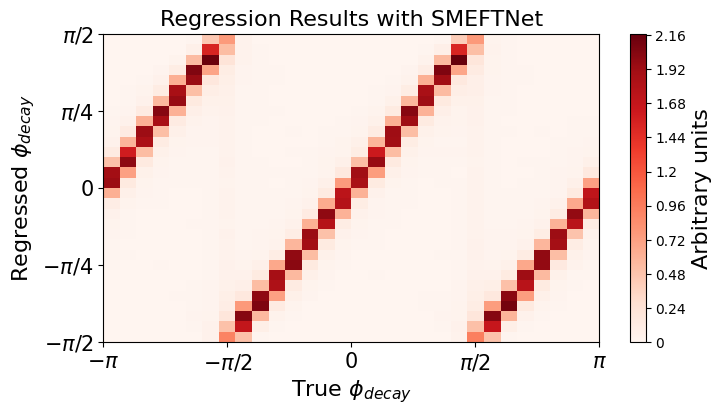

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/SMEFTNET.npy')
x = data[:, 1]  
y = data[:, 0]  

x_edges = np.linspace(-pi, pi, 31)
y_edges = np.linspace(-pi/2, pi/2, 31)

H, xedges, yedges = np.histogram2d(x, y, bins=[x_edges, y_edges])


plt.figure(figsize=(8, 4))
im = plt.imshow(H.T, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto',cmap='Reds')

cbar = plt.colorbar(im)
cbar.set_label('Arbitrary units', size=16)
cbar.formatter = FuncFormatter(lambda x, pos: f"{x / 3600:.2f}")
cbar.update_ticks()

cbar.set_ticks([0,900, 1800, 2700, 3600, 4500, 5400, 6300, 7200, 8100])
cbar.set_ticklabels(['0', '0.24', '0.48', '0.72', '0.96', '1.2', '1.44', '1.68', '1.92', '2.16'])
 
ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
plt.xticks(ticks1, tick_labels1,fontsize=15)
plt.yticks(ticks2, tick_labels2,fontsize=15)
plt.xlabel(r'True $\phi_{decay}$', fontsize = 16)
plt.ylabel(r'Regressed $\phi_{decay}$', fontsize = 16)
plt.title('Regression Results with SMEFTNet', fontsize=16)
plt.savefig('plot1.pdf',dpi=750, bbox_inches='tight')
plt.show()

# Figure 3 right

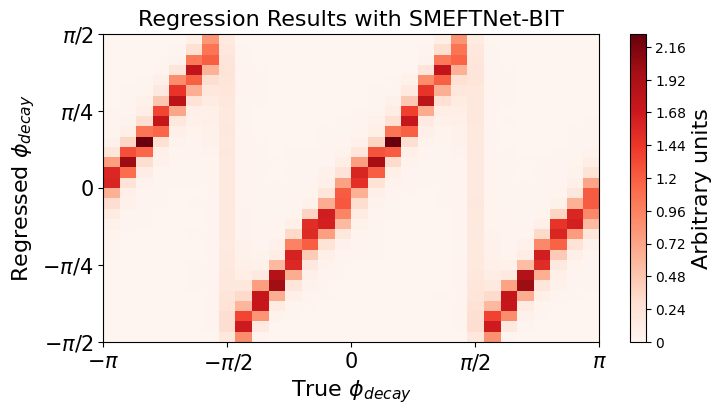

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/BITNET_100%.npy')
x = data[:, 1]  
y = data[:, 0]  

x_edges = np.linspace(-pi, pi, 31)
y_edges = np.linspace(-pi/2, pi/2, 31)

H, xedges, yedges = np.histogram2d(x, y, bins=[x_edges, y_edges])

plt.figure(figsize=(8, 4))
im = plt.imshow(H.T, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto',cmap='Reds')

cbar = plt.colorbar(im)
cbar.set_label('Arbitrary units', size=16)
cbar.formatter = FuncFormatter(lambda x, pos: f"{x / 3600:.2f}")
cbar.update_ticks()

cbar.set_ticks([0,900, 1800, 2700, 3600, 4500, 5400, 6300, 7200, 8100])
cbar.set_ticklabels(['0', '0.24', '0.48', '0.72', '0.96', '1.2', '1.44', '1.68', '1.92', '2.16'])

ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
plt.xticks(ticks1, tick_labels1,fontsize=15)
plt.yticks(ticks2, tick_labels2,fontsize=15)
plt.xlabel(r'True $\phi_{decay}$', fontsize = 16)
plt.ylabel(r'Regressed $\phi_{decay}$', fontsize = 16)
plt.title('Regression Results with SMEFTNet-BIT', fontsize=16)
plt.savefig('plot2.pdf',dpi=750, bbox_inches='tight')
plt.show()

# Figure 4 left

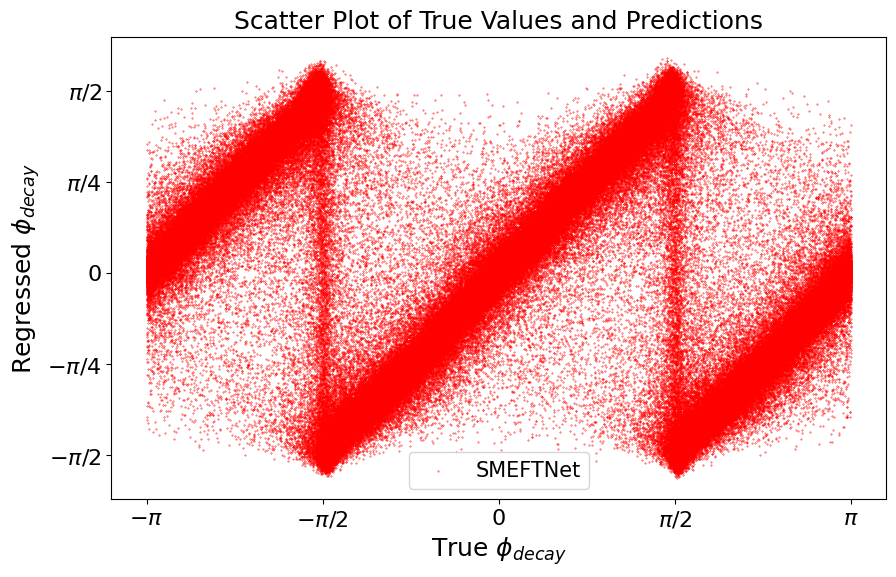

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/SMEFTNET.npy')

x1 = data[:, 1]  
y1 = data[:, 0]

plt.figure(figsize=(10, 6))  
plt.scatter(x1, y1, color='red', label='SMEFTNet', s=0.1)  

ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
plt.xticks(ticks1, tick_labels1,fontsize=16)
plt.yticks(ticks2, tick_labels2,fontsize=16)
plt.title('Scatter Plot of True Values and Predictions',fontsize = 18)  
plt.xlabel(r'True $\phi_{decay}$', fontsize = 18)
plt.ylabel(r'Regressed $\phi_{decay}$', fontsize = 18)
plt.legend(fontsize=15)
plt.savefig('plot3.pdf',dpi=750,bbox_inches='tight')
plt.show()

# Figure 4 right

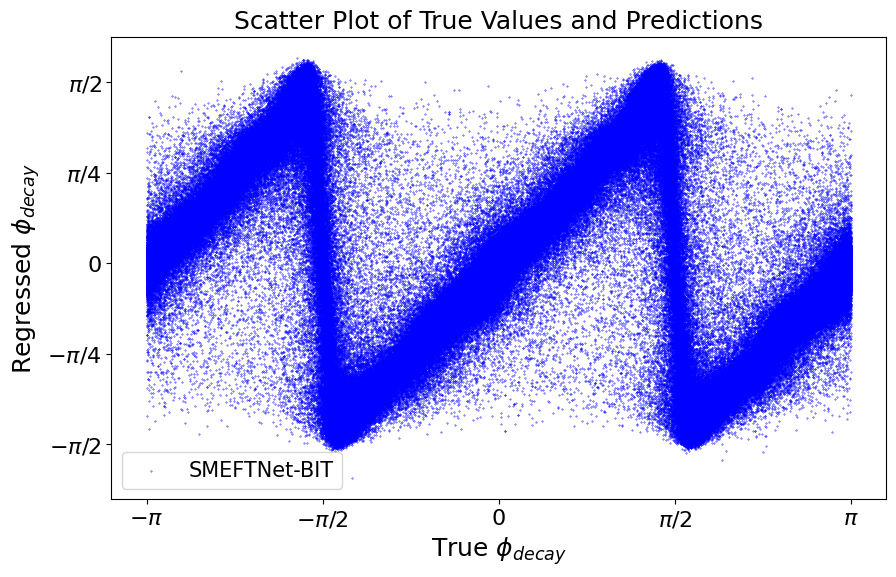

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/BITNET_100%.npy')

x1 = data[:, 1]  
y1 = data[:, 0]

plt.figure(figsize=(10, 6))  
plt.scatter(x1, y1, color='blue', label='SMEFTNet-BIT', s=0.1) 

ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
plt.xticks(ticks1, tick_labels1,fontsize=16)
plt.yticks(ticks2, tick_labels2,fontsize=16)
plt.title('Scatter Plot of True Values and Predictions',fontsize=18)  
plt.xlabel(r'True $\phi_{decay}$', fontsize = 18)
plt.ylabel(r'Regressed $\phi_{decay}$', fontsize = 18)

plt.legend(fontsize=15)
plt.savefig('plot4.pdf',dpi=750,bbox_inches='tight')
plt.show()

# Figure 6 left

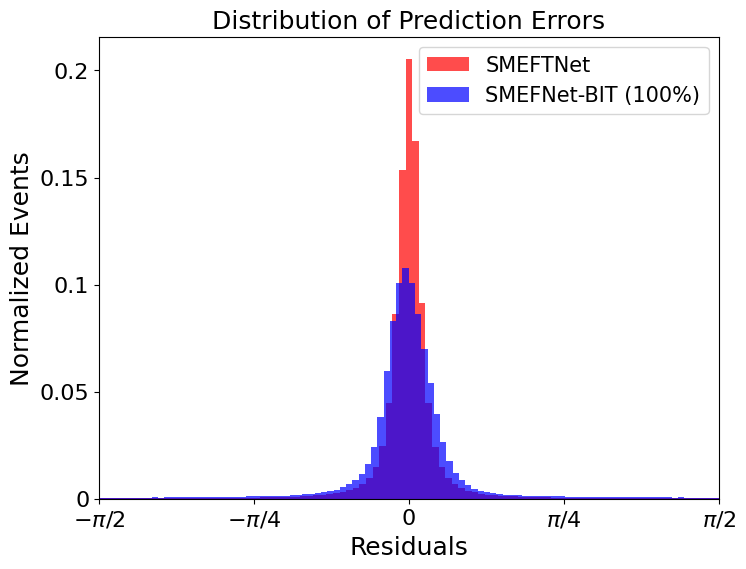

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

dataA = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/SMEFTNET.npy')
dataB = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/BITNET_100%.npy')

x1 = dataA[:, 0]  
y1 = dataA[:, 1]
x2 = dataB[:, 0]  
y2 = dataB[:, 1]
zA = np.zeros_like(x1)
zB = np.zeros_like(x2)

maskA1 = (-np.pi/2 < y1) & (y1 < np.pi/2)
zA[maskA1] = x1[maskA1] - y1[maskA1]
maskB1 = (-np.pi/2 < y2) & (y2 < np.pi/2)
zB[maskB1] = x2[maskB1] - y2[maskB1]

maskA2 = (np.pi/2 <= y1) & (y1 < np.pi)
zA[maskA2] = x1[maskA2] - y1[maskA2] + np.pi 
maskB2 = (np.pi/2 <= y2) & (y2 < np.pi)
zB[maskB2] = x2[maskB2] - y2[maskB2] + np.pi 

maskA3 = (-np.pi <= y1) & (y1 < -np.pi/2)
zA[maskA3] = x1[maskA3] - y1[maskA3] - np.pi
maskB3 = (-np.pi <= y2) & (y2 < -np.pi/2)
zB[maskB3] = x2[maskB3] - y2[maskB3] - np.pi
totalA = len(zA)
totalB = len(zB)
plt.figure(figsize=(8, 6)) 
plt.hist(zA, bins=200, color='red', alpha=0.7, weights=np.ones(totalA)/totalA, label='SMEFTNet')  
plt.hist(zB, bins=200, color='blue', alpha=0.7, weights=np.ones(totalB)/totalB, label='SMEFNet-BIT (100%)')  
ticks = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tickx = [0, 0.05, 0.1, 0.15, 0.2] 
tick_labels = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
tick_labelx = ['0', '0.05', '0.1', '0.15', '0.2'] 

plt.xticks(ticks, tick_labels, fontsize = 16)
plt.yticks(tickx, tick_labelx, fontsize = 16)

plt.xlim(-pi/2, pi/2)
plt.title('Distribution of Prediction Errors', fontsize = 18) 
plt.xlabel('Residuals',fontsize = 18)  
plt.ylabel('Normalized Events',fontsize = 18)  

plt.legend(fontsize=15)
plt.savefig('plot5.pdf',dpi=750,bbox_inches='tight')
plt.show()

# Figure 6 middle

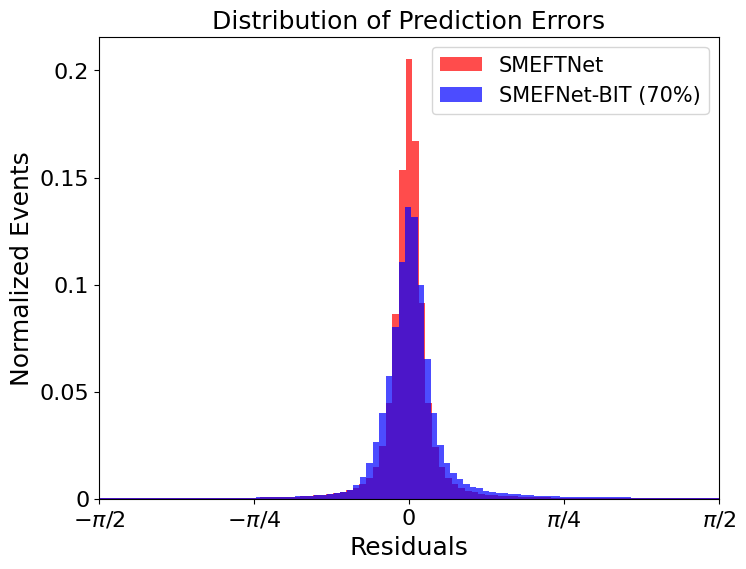

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

dataA = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/SMEFTNET.npy')
dataB = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/BITNET_70%.npy')

x1 = dataA[:, 0]  
y1 = dataA[:, 1]
x2 = dataB[:, 0]  
y2 = dataB[:, 1]
zA = np.zeros_like(x1)
zB = np.zeros_like(x2)

maskA1 = (-np.pi/2 < y1) & (y1 < np.pi/2)
zA[maskA1] = x1[maskA1] - y1[maskA1]
maskB1 = (-np.pi/2 < y2) & (y2 < np.pi/2)
zB[maskB1] = x2[maskB1] - y2[maskB1]

maskA2 = (np.pi/2 <= y1) & (y1 < np.pi)
zA[maskA2] = x1[maskA2] - y1[maskA2] + np.pi 
maskB2 = (np.pi/2 <= y2) & (y2 < np.pi)
zB[maskB2] = x2[maskB2] - y2[maskB2] + np.pi 

maskA3 = (-np.pi <= y1) & (y1 < -np.pi/2)
zA[maskA3] = x1[maskA3] - y1[maskA3] - np.pi
maskB3 = (-np.pi <= y2) & (y2 < -np.pi/2)
zB[maskB3] = x2[maskB3] - y2[maskB3] - np.pi

totalA = len(zA)
totalB = len(zB)
plt.figure(figsize=(8, 6))
plt.hist(zA, bins=200, color='red', alpha=0.7, weights=np.ones(totalA)/totalA, label='SMEFTNet')  
plt.hist(zB, bins=200, color='blue', alpha=0.7, weights=np.ones(totalB)/totalB, label='SMEFNet-BIT (70%)')  
ticks = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tickx = [0, 0.05, 0.1, 0.15, 0.2] 
tick_labels = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
tick_labelx = ['0', '0.05', '0.1', '0.15', '0.2'] 

plt.xticks(ticks, tick_labels, fontsize = 16)
plt.yticks(tickx, tick_labelx, fontsize = 16)

plt.xlim(-pi/2, pi/2)
plt.title('Distribution of Prediction Errors', fontsize = 18)
plt.xlabel('Residuals',fontsize = 18)  
plt.ylabel('Normalized Events',fontsize = 18)  

plt.legend(fontsize=15)
plt.savefig('plot6.pdf',dpi=750,bbox_inches='tight')
plt.show()

# Figure 6 right

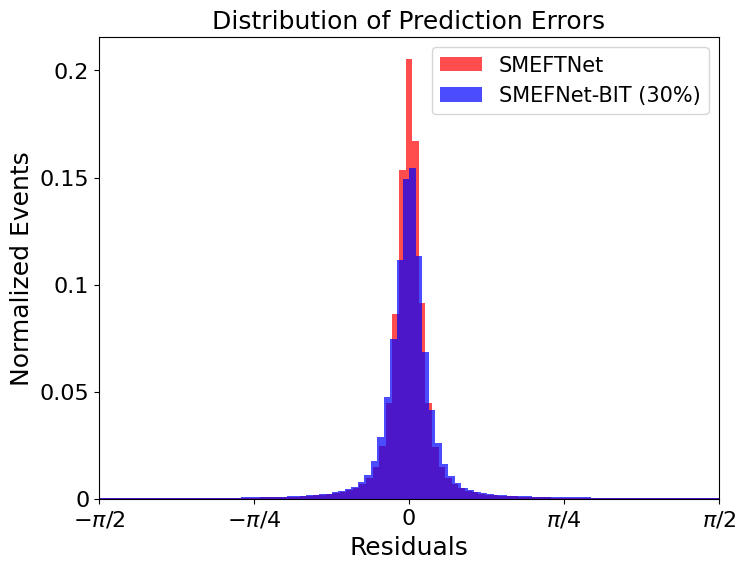

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

dataA = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/SMEFTNET.npy')
dataB = np.load('/home/daohan/apps/Bit/SMEFTNet/code/plots_data/BITNET_30%.npy')

x1 = dataA[:, 0]  
y1 = dataA[:, 1]
x2 = dataB[:, 0]  
y2 = dataB[:, 1]
zA = np.zeros_like(x1)
zB = np.zeros_like(x2)

maskA1 = (-np.pi/2 < y1) & (y1 < np.pi/2)
zA[maskA1] = x1[maskA1] - y1[maskA1]
maskB1 = (-np.pi/2 < y2) & (y2 < np.pi/2)
zB[maskB1] = x2[maskB1] - y2[maskB1]

maskA2 = (np.pi/2 <= y1) & (y1 < np.pi)
zA[maskA2] = x1[maskA2] - y1[maskA2] + np.pi 
maskB2 = (np.pi/2 <= y2) & (y2 < np.pi)
zB[maskB2] = x2[maskB2] - y2[maskB2] + np.pi 

maskA3 = (-np.pi <= y1) & (y1 < -np.pi/2)
zA[maskA3] = x1[maskA3] - y1[maskA3] - np.pi
maskB3 = (-np.pi <= y2) & (y2 < -np.pi/2)
zB[maskB3] = x2[maskB3] - y2[maskB3] - np.pi

totalA = len(zA)
totalB = len(zB)
plt.figure(figsize=(8, 6))  
plt.hist(zA, bins=200, color='red', alpha=0.7, weights=np.ones(totalA)/totalA, label='SMEFTNet')  
plt.hist(zB, bins=200, color='blue', alpha=0.7, weights=np.ones(totalB)/totalB, label='SMEFNet-BIT (30%)')  
ticks = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tickx = [0, 0.05, 0.1, 0.15, 0.2] 
tick_labels = ['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'] 
tick_labelx = ['0', '0.05', '0.1', '0.15', '0.2'] 

plt.xticks(ticks, tick_labels, fontsize = 16)
plt.yticks(tickx, tick_labelx, fontsize = 16)

plt.xlim(-pi/2, pi/2)
plt.title('Distribution of Prediction Errors', fontsize = 18)  
plt.xlabel('Residuals',fontsize = 18)  
plt.ylabel('Normalized Events',fontsize = 18)  

plt.legend(fontsize=15)
plt.savefig('plot7.pdf',dpi=750,bbox_inches='tight')
plt.show()